# Аналитика в авиакомпании средствами Python

### Импортирт библиотек и файлов:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
pd.options.display.max_columns = None

aircrafts = pd.read_csv('/datasets/query_1.csv')
city = pd.read_csv('/datasets/query_3.csv')

### Изучение данных

Посмотрим на таблицу с данными о моделях самолетов и количеству полетов на них:

In [2]:
aircrafts

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Посмотрим общую информацию о датафрейме:

In [3]:
aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
aircrafts.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


***Выводы:*** 
1. Типы данных в таблице aircrafts верные, преобразовывать их не требуется. 
2. Пропуски отсутствуют.
3. Аномальных значений в столбце flights_amount нет. 

Данные готовы для дальнейшей работы с ними.

Тоже самое сделаем и с таблицей city, она содержит данные о городах и среднему количеству прибывающих рейсов в день.


In [5]:
city

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [6]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
city.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


***Выводы:*** 
1. Типы данных в таблице city верные. 
2. Пропусков нет.
3. Аномальных значений в столбце average_flights нет. 

Данные готовы к использованию.

### Построение графиков

Построю график по таблице aircrafts.

Отсортирую столбец flights_amount в датафрейме aircrafts по убыванию и построим график.

In [8]:
aircrafts = aircrafts.sort_values(by = 'flights_amount', ascending = False)

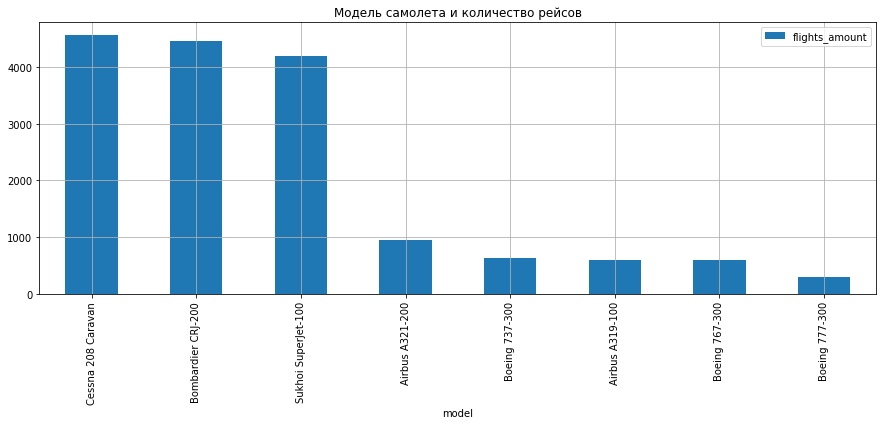

In [9]:
aircrafts.plot(x = 'model', y = 'flights_amount', kind = 'bar',  grid=True, figsize = (15, 5), title = 'Модель самолета и количество рейсов')

***Выводы:*** 

1. Чаще других используются самолеты Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100.
2. Остальные модели самолетов используются, как минимум, в 4 раза реже моделей самолетов из топ-3.

Построю график по таблице city.

Отсортирую столбец average_flights в датафрейме city по убыванию и построим график.

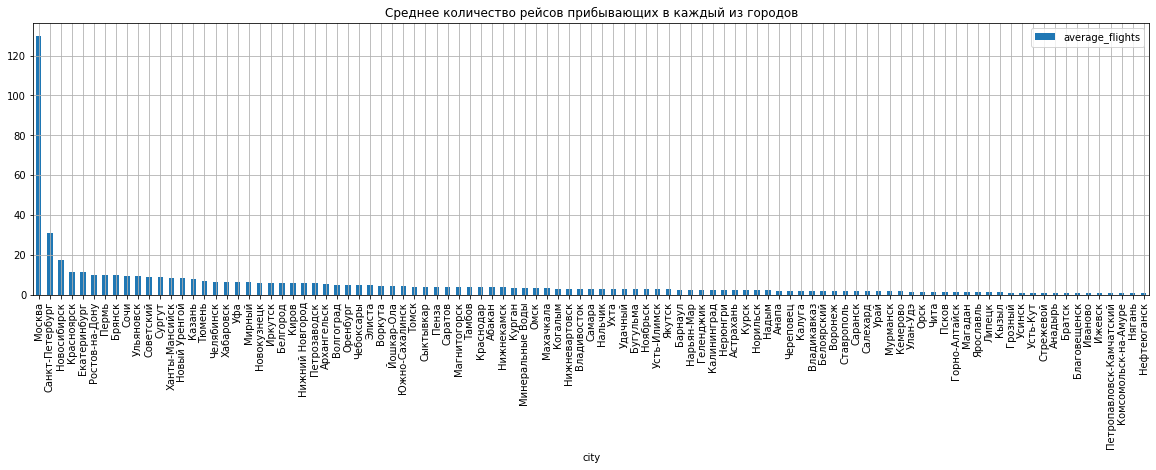

In [10]:
city.sort_values(by = 'average_flights', ascending = False).plot(x = 'city', y = 'average_flights', kind = 'bar', grid=True, figsize=(20, 5), title = 'Среднее количество рейсов прибывающих в каждый из городов')

Построим график для топ-10 городов по количеству рейсов:

In [11]:
top_10_cities = city.sort_values(by = 'average_flights', ascending = False)[:10].reset_index(drop = True)
top_10_cities

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


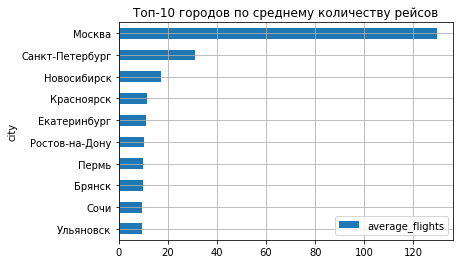

In [12]:
top_10_cities.sort_values(by = 'average_flights', ascending = True).plot(x='city',y='average_flights',kind='barh', grid= True, title='Топ-10 городов по среднему количеству рейсов');

***Выводы:*** 

1. На первом месте с большим отрывом Москва, 130 рейсов в день, в столице среднее количество прибывающих в день рейсов в 4 раза больше, чем в Санкт-Петербурге(31,2 рейсов в день). 
2. В Новосибирск в день прилетает в два раза меньше самолетов, чем в Санкт-Петербург. 
3. В остальных горадах это значение еще меньше, в среднем 5,5 рейсов в день.

### Выводы

1. Изучены данные в файлах.

2. Построены графики: 
    модели самолетов и количество рейсов
    города и количество рейсов 

Выбраны самые часто используемые модели самолетов - это Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100.

3. Выбраны топ-10 городов и количество рейсов, построен график.

Топ-3 города по количеству прибывающих рейсов - Москва, Санкт-Петербург, Новосибирск. 